In [6]:
import pandas as pd
import numpy as np
import os.path as op
from matplotlib import pyplot as plt

IMAGE_WIDTH = {5: 15, 20: 60, 60: 180}
IMAGE_HEIGHT = {5: 32, 20: 64, 60: 96}

In [7]:
#Load images by year

year = 1993
images = np.memmap(op.join("./img_data", "./monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_images.dat"), dtype=np.uint8, mode='r').reshape(
                        (-1, IMAGE_HEIGHT[20], IMAGE_WIDTH[20]))
print(images.shape)
images[0]

(85644, 64, 60)


memmap([[255, 255, 255, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0, 255,   0, ...,   0,   0,   0]], dtype=uint8)

In [8]:
#Load Labels
#'Date': The last day of the 20-day rolling window for the chart.
#'StockID': CRSP PERMNO that identifies the stock.
#'MarketCap': Market capitalization in dollar, recorded in thousands.
#'Ret_{t}d': t=5,20,60, next t-day holding period return.
#'Ret_month': Holding period return for the next month, from the current monthend to the next monthend.
#'EWMA_vol': Exponentially weighted volatility (square of daily returns) with alpha as 0.05. One day delay is included.
    
    
label_df = pd.read_feather(op.join("./img_data", "./monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_labels_w_delay.feather"))
label_df.head()


,Date,StockID,MarketCap,Ret_5d,Ret_20d,Ret_60d,Ret_month,EWMA_vol
0,1993-01-29,10001,-15120.000,3.240260e-07,0.035714,0.065641,0.017857,0.000417
1,1993-02-26,10001,15390.000,-8.771723e-03,0.002584,0.073561,0.011456,0.000342
2,1993-03-31,10001,15318.750,-8.771614e-03,0.105263,0.117841,0.070175,0.000471
3,1993-04-30,10001,-16393.750,3.278655e-02,-0.008199,0.085991,-0.008199,0.000389
4,1993-05-28,10001,-16259.375,2.809882e-02,0.086608,0.136763,0.103326,0.000566


0


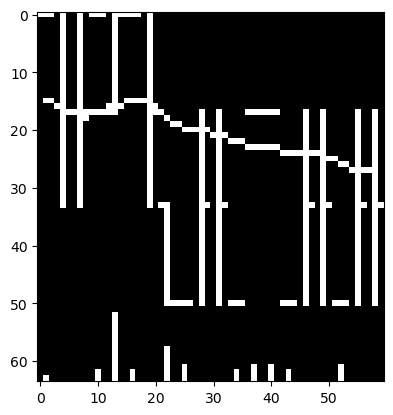

1


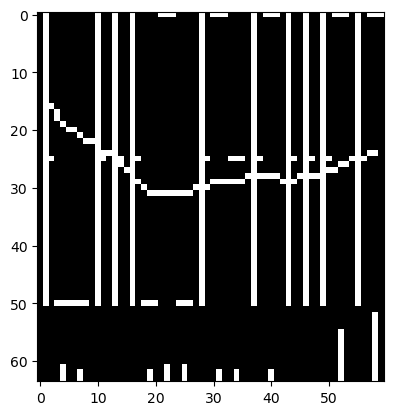

2


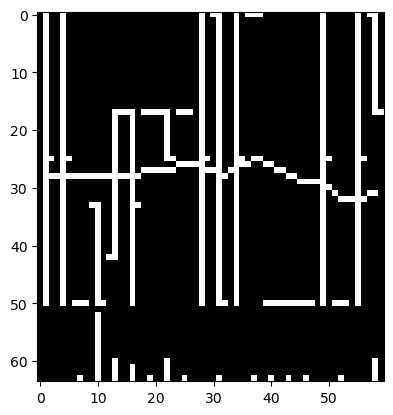

3


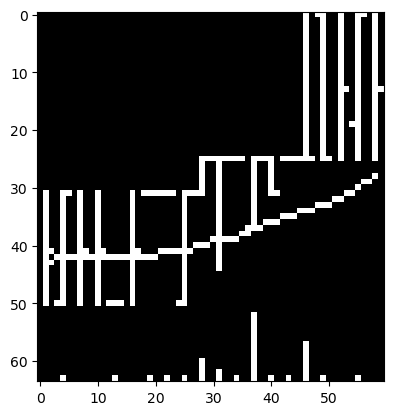

4


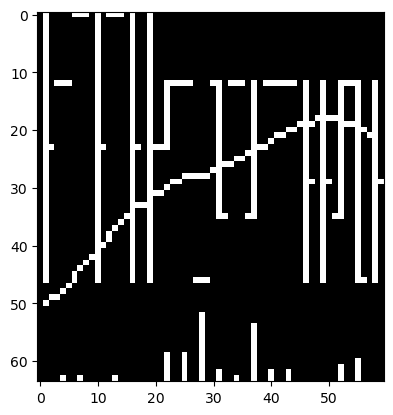

In [9]:
#Plot the sample images

from matplotlib import pyplot as plt
for i in range(5):
    print(i)
    plt.imshow(images[i], cmap='gray')
    plt.show()